<a href="https://colab.research.google.com/github/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Lectures/casadi_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CASADI Examples**

In [112]:
!pip3 install sympy seaborn ffmpeg-python qpsolvers casadi

In [ ]:
import sympy as sym
from sympy import Symbol, simplify, lambdify
from sympy.matrices.expressions import transpose
from sympy import sin, cos, Matrix
import numpy as np
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib import animation
%matplotlib inline

In [ ]:
from casadi import *
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [126]:
# Example: no constraint
opti = casadi.Opti()
x = opti.variable(2)
X = x[0]
Y = x[1]

# Define cost function that we want to minimize
cost  = 3*(1-x[0])**2*exp(-x[0]**2 - (x[1]+1)**2) \
        - 10*(x[0]/5 - x[0]**3 - x[1]**5)*exp(-x[0]**2 - x[1]**2) \
        - 1/3*exp(-(x[0]+1)**2 - x[1]**2)
opti.minimize(cost)

p_opts = {"expand":True, 'ipopt.print_level':3, 'print_time':3}
s_opts = {"max_iter": 300}

opti.set_initial(x,[0,-2])

opti.solver('ipopt', p_opts, s_opts)
sol = opti.solve()

x_sol = sol.value(x)
min_cost = sol.value(cost)
print(x_sol)

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:  -6.5511333328358372e+00   -6.5511333328358372e+00
Dual infeasibility......:   1.8474111129762605e-13    1.8474111129762605e-13
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarit

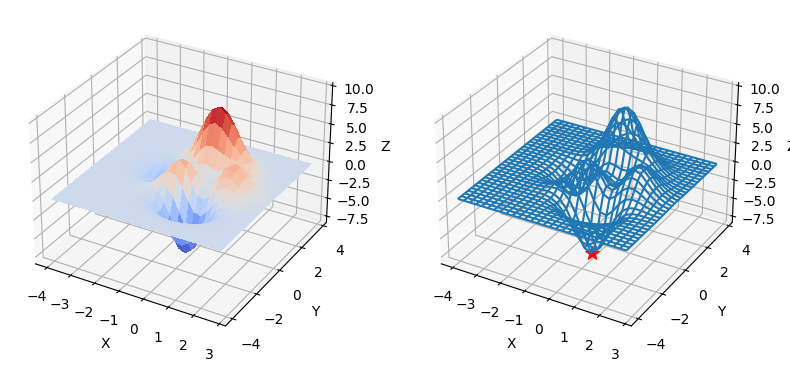

In [127]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Make data.
X = np.arange(-4, 3, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 3*(1-X)**2* np.exp(-X**2 - (Y+1)**2) \
          - 10*(X/5 - X**3 - Y**5)* np.exp(-X**2 - Y**2) \
          - 1/3* np.exp(-(X+1)**2 - Y**2)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-8, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Wire plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.scatter(x_sol[0], x_sol[1], min_cost, c='red', marker='*', s=100)

ax.set_zlim(-8, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [130]:
# casadi_example_constraint():
opti = casadi.Opti()
x = opti.variable(2)

# Define cost function that we want to minimize
cost  = 3*(1-x[0])**2*exp(-x[0]**2 - (x[1]+1)**2) \
        - 10*(x[0]/5 - x[0]**3 - x[1]**5)*exp(-x[0]**2 - x[1]**2) \
        - 1/3*exp(-(x[0]+1)**2 - x[1]**2)
opti.minimize(cost)

opti.subject_to(x <= [2, 2.5])
opti.subject_to([-2, -1]<=x)

# A = np.array([[1.25, 1]])
# b = np.array([-1])
# opti.subject_to(A@x == b)

# C = np.array([[-1, -1]])
# d = np.array([0])
# opti.subject_to(C@x <= d)

opti.subject_to( (x[0]-.375)**2 + (x[1]-.375)**2 - .5**2 == 0)
opti.set_initial(x,[1,1])

p_opts = {"expand":True, 'ipopt.print_level':3, 'print_time':3}
s_opts = {"max_iter": 300}
opti.solver('ipopt', p_opts, s_opts)
sol = opti.solve()
x_sol = sol.value(x)
min_cost = sol.value(cost)
print(min_cost)
print(x_sol)

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2


Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:   1.5402004439354726e+00    1.5402004439354726e+00
Dual infeasibility......:   3.4194869158454821e-14    3.4194869158454821e-14
Constraint violation....:   2.8865798640254070e-15    2.8865798640254070e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarit

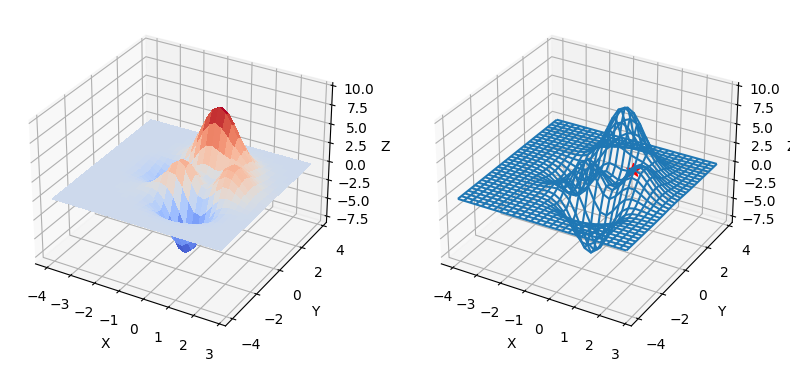

In [133]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Make data.
X = np.arange(-4, 3, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 3*(1-X)**2* np.exp(-X**2 - (Y+1)**2) \
          - 10*(X/5 - X**3 - Y**5)* np.exp(-X**2 - Y**2) \
          - 1/3* np.exp(-(X+1)**2 - Y**2)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-8, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Wire plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.scatter(x_sol[0], x_sol[1], min_cost, c='red', marker='*', s=100)

ax.set_zlim(-8, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()